# Initialization

Welcome to the first assignment of Improving Deep Neural Networks!

Training your neural network requires specifying an initial value of the weights. A well-chosen initialization method helps the learning process.

If you completed the previous course of this specialization, you probably followed the instructions for weight initialization, and seen that it's worked pretty well so far. But how do you choose the initialization for a new neural network? In this notebook, you'll try out a few different initializations, including random, zeros, and He initialization, and see how each leads to different results.

A well-chosen initialization can:
- Speed up the convergence of gradient descent
- Increase the odds of gradient descent converging to a lower training (and generalization) error 

Let's get started!

## Important Note on Submission to the AutoGrader

Before submitting your assignment to the AutoGrader, please make sure you are not doing the following:

1. You have not added any _extra_ `print` statement(s) in the assignment.
2. You have not added any _extra_ code cell(s) in the assignment.
3. You have not changed any of the function parameters.
4. You are not using any global variables inside your graded exercises. Unless specifically instructed to do so, please refrain from it and use the local variables instead.
5. You are not changing the assignment code where it is not required, like creating _extra_ variables.

If you do any of the following, you will get something like, `Grader Error: Grader feedback not found` (or similarly unexpected) error upon submitting your assignment. Before asking for help/debugging the errors in your assignment, check for these first. If this is the case, and you don't remember the changes you have made, you can get a fresh copy of the assignment by following these [instructions](https://www.coursera.org/learn/deep-neural-network/supplement/QWEnZ/h-ow-to-refresh-your-workspace).

## Table of Contents
- [1 - Packages](#1)
- [2 - Loading the Dataset](#2)
- [3 - Neural Network Model](#3)
- [4 - Zero Initialization](#4)
    - [Exercise 1 - initialize_parameters_zeros](#ex-1)
- [5 - Random Initialization](#5)
    - [Exercise 2 - initialize_parameters_random](#ex-2)
- [6 - He Initialization](#6)
    - [Exercise 3 - initialize_parameters_he](#ex-3)
- [7 - Conclusions](#7)

<a name='1'></a>
## 1 - Packages

In [3]:
import os

In [4]:
print(os.getcwd())
os.chdir('/app/Chapter02-Hyper-parameters-fine-Tuning/W1A1')

/app


In [5]:
### v1.1

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
from public_tests import *
from init_utils import sigmoid, relu, compute_loss, forward_propagation, backward_propagation
from init_utils import update_parameters, predict, load_dataset, plot_decision_boundary, predict_dec

%matplotlib inline
plt.rcParams['figure.figsize'] = (7.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

# load image dataset: blue/red dots in circles
# train_X, train_Y, test_X, test_Y = load_dataset()

2025-10-05 09:20:01.055022: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-10-05 09:20:01.055082: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-10-05 09:20:01.200592: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-10-05 09:20:01.506291: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-10-05 09:20:03.892408: W tensorflow/comp

<a name='2'></a>
## 2 - Loading the Dataset

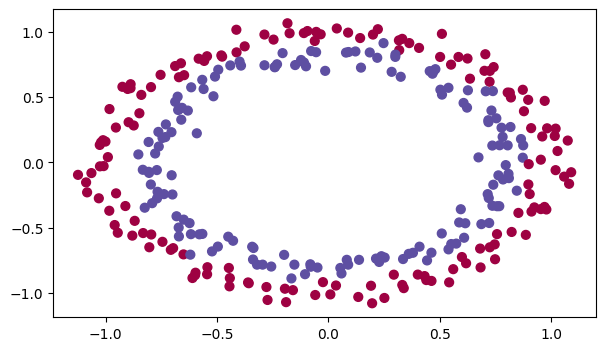

In [7]:
train_X, train_Y, test_X, test_Y = load_dataset()

For this classifier, you want to separate the blue dots from the red dots.

<a name='3'></a>
## 3 - Neural Network Model 

You'll use a 3-layer neural network. These are the iniitalization methods you'll experiment with: 
1. Zeros initialization 
2. Random initialization
3. He initialization  -  setting initialization= 'he' in the input argument. This initializs the weights to random values scale accroding a paper by He et al., 2015.

**Instructions** Read over the code below, and run it.

In [8]:
def model(X, Y, learning_rate = 0.01, num_iterations = 15000, print_cost = True, initialization = "he"):
    """
    Implements a three-layer neural network: LINEAR->RELU->LINEAR->RELU->LINEAR->SIGMOID.
    Arguments:
    X -- input data, of shape (2, number of examples)
    y -- true "label" vector (containing 0 if red dot / 1 if blue dot), of shape (1, number of examples)
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations to run gradient descent
    print_cost -- if True, print the cost every 1000 iterations
    initialization -- flag to choose which initialization to use ("zeros","random" or "he")
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.

    """
    grads = {} # to store gradients
    costs = [] # to keep track of the cost
    m = X.shape[1] # number of examples
    layers_dims = [X.shape[0], 10, 5, 1] # 3-layer model with layer dimension inforormation as a list 
    
     
    # Initialize parameters dictionary.  These three functions will be implemented in the next cells.
    if initialization == "zeros":
        parameters = initialize_parameters_zeros(layers_dims)
    elif initialization == "random":
        parameters = initialize_parameters_random(layers_dims)
    elif initialization == "he":
        parameters = initialize_parameters_he(layers_dims)
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):
        # Forward propagation: LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID.
        a3, cache = forward_propagation(X, parameters)
        
        # Compute cost
        cost = compute_loss(a3, Y)

        # Backward propagation
        grads = backward_propagation(X, Y, cache)
        # Update parameters
        parameters = update_parameters(parameters, grads, learning_rate)
        
        # Print the loss every 1000 iterations
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
            costs.append(cost)
    # plot the cost
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations (per thousands)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters


    
    

### Zero initialization

There are two types of parameters to initialize in a neural network
- the weight matrics (W1, W2, ......, Wl)
- the bias vectors (b1, b2, ......, bl)

**Exercise1** -initialize_parameters_zeros
Implement the following function to initialize all parameters to zeros. You'll see later that this does not work will since it fails to "break symmetry", but try ut anyway and see what happens. 


In [9]:
## GRADE FUNCTION: initialize_parameters_zero
def initialize_parameters_zeros(layers_dims):
    """
    Argument:
    layer_dims -- python array (list) containing the size of each layer.  e.g. [2,4,5,1] means: 2-input layer, 4-neuron hidden layer, 5-neuron hidden layer, 1-output layer. index in this array will be used as the layer index in the parameters dictionary.
        
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    Wl -- weight matrix of shape (layer_dims[l], layer_dims[l-1])
                    bl -- bias vector of shape (layer_dims[l], 1)
    """
    
    parameters = {}
    L = len(layers_dims)   # number of layers in the network
    
    for l in range(1, L):
        parameters['W' + str(l)] = np.zeros((layers_dims[l], layers_dims[l-1]))
        parameters['b' + str(l)] = np.zeros((layers_dims[l], 1))
        
        # Ensure that your dimensions are correct
        assert(parameters['W' + str(l)].shape == (layers_dims[l], layers_dims[l-1]))
        assert(parameters['b' + str(l)].shape == (layers_dims[l], 1))

        
    return parameters
# --- IGNORE ---

In [10]:
parameters = initialize_parameters_zeros([4,8,2,1])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))
initialize_parameters_zeros_test(initialize_parameters_zeros)

W1 = [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
W2 = [[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]
b2 = [[0.]
 [0.]]
 All tests passed.


Run the following code to train your model on 15,000 iterations using zeros initialization

Cost after iteration 0: 0.693147
Cost after iteration 1000: 0.693147
Cost after iteration 2000: 0.693147
Cost after iteration 3000: 0.693147
Cost after iteration 4000: 0.693147
Cost after iteration 5000: 0.693147
Cost after iteration 6000: 0.693147
Cost after iteration 7000: 0.693147
Cost after iteration 8000: 0.693147
Cost after iteration 9000: 0.693147
Cost after iteration 10000: 0.693147
Cost after iteration 11000: 0.693147
Cost after iteration 12000: 0.693147
Cost after iteration 13000: 0.693147
Cost after iteration 14000: 0.693147


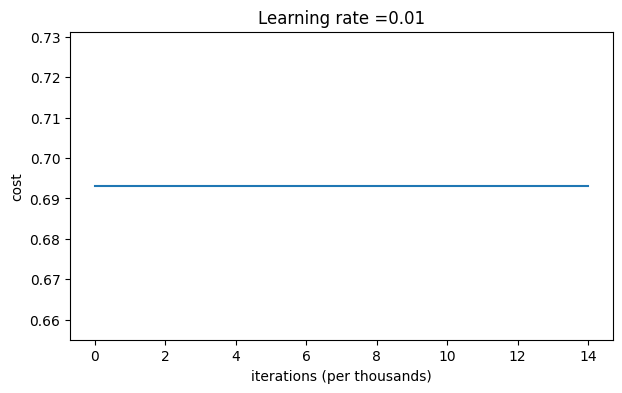

On the train set:
Accuracy: 0.5
On the test set:
Accuracy: 0.5


In [11]:
parameters = model(train_X, train_Y, initialization = "zeros")
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

**The performance is terrible, the cost doesn't decrease**, and the algorithm perform no better than random guessing. Why? take a loot at the details of the predictions and the decision boundary.


In [12]:
print("predictions_train = " + str(predictions_train))
print("predictions_test = " + str(predictions_test))

predictions_train = [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0]]
predictions_test = [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


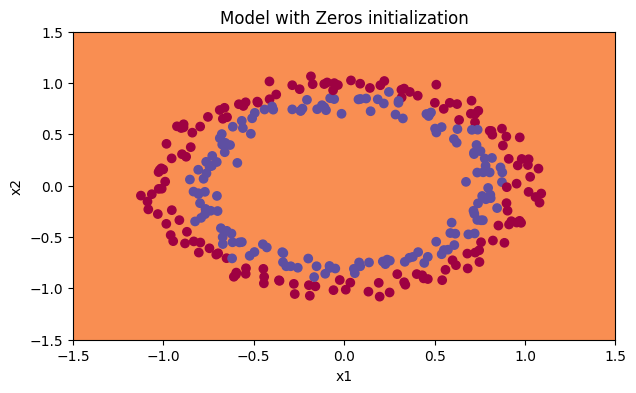

In [13]:
plt.title("Model with Zeros initialization")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

A simple explanationis provided below: 

Note: For sake of simplicity calculations below are done using only one example at a time:  

Since the weights and biases are zero, multiplying by weights creates the zero vectors which give 0 when the activation function is ReLU. As z = 0

$$a = ReLU(z) = max(0, z) = 0$$

At the classification layer, where the activation function is sigmoid you then get (for either input):

$$\sigma(z) = \frac{1}{ 1 + e^{-(z)}} = \frac{1}{2} = y_{pred}$$

As for every example you are getting a 0.5 chance of it being true our cost function becomes helpless in adjusting the weights.

Your loss function:
$$ \mathcal{L}(a, y) =  - y  \ln(y_{pred}) - (1-y)  \ln(1-y_{pred})$$

For `y=1`, `y_pred=0.5` it becomes:

$$ \mathcal{L}(0, 1) =  - (1)  \ln(\frac{1}{2}) = 0.6931471805599453$$

For `y=0`, `y_pred=0.5` it becomes:

$$ \mathcal{L}(0, 0) =  - (1)  \ln(\frac{1}{2}) = 0.6931471805599453$$

As you can see with the prediction being 0.5 whethehr the actual y value is 1 or 0 you get the same loss function for both, so none of the weights get adjusted and you are stuck with the same old value of the weights. 

*for every layer dw = 0, so weight cannnot get adjusted and struck with the same old value. *
$$dw =dz*a^{(l-1)}$$
 Since al = 0 always

This is why you can see that the model is predicting 0 for every example! No wonder it's doing so bad.  

In general, initializing all the weights to zero result in the network failing to break symmetry. this means that every neural in each layer will learn the same thing, so you might as well be training a neural network with $n^{[l]}=1$ for every layer. This way, the network is no more powerful than a linear classifier like logistic regression. 




<font color='blue'>

**what you should remember**
- the weight $W^{(l)}$ should be initialized randomly to break symmetry. 
- However, it's okay to initialize the biases to zeros. Symmetry is still broken so long as $W^{[l]}$ is initialized randomly. 


## 5 - Random Initialization

### Exercise 2 - initialize_parameters_random
Implement the following function to initialize your weights to large random values (scaled by \*10) and your biases to zeros. Use `np.random.randn(..,..) * 10` for weights and `np.zeros((.., ..))` for biases. You're using a fixed `np.random.seed(..)` to make sure your "random" weights  match ours, so don't worry if running your code several times always gives you the same initial values for the parameters. 


In [33]:
## GRADE FUNCTION: initialize_parameters_random
def initialize_parameters_random(layers_dims):
    """
    Argument:
    layer_dims -- python array (list) containing the size of each layer.  e.g. [2,4,5,1] means: 2-input layer, 4-neuron hidden layer, 5-neuron hidden layer, 1-output layer. index in this array will be used as the layer index in the parameters dictionary.
        
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    Wl -- weight matrix of shape (layer_dims[l], layer_dims[l-1])
                    bl -- bias vector of shape (layer_dims[l], 1)
    """
    
    np.random.seed(3)               # This seed makes sure your "random" numbers will be the same as ours
    parameters = {}
    L = len(layers_dims)   # number of layers in the network
    
    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layers_dims[l], layers_dims[l-1]) * 10
        parameters['b' + str(l)] = np.zeros((layers_dims[l], 1))
        
        # Ensure that your dimensions are correct
        assert(parameters['W' + str(l)].shape == (layers_dims[l], layers_dims[l-1]))
        assert(parameters['b' + str(l)].shape == (layers_dims[l], 1))

        
    return parameters

In [34]:
parameters = initialize_parameters_random([3,2,1])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))
initialize_parameters_random_test(initialize_parameters_random) 

W1 = [[ 17.88628473   4.36509851   0.96497468]
 [-18.63492703  -2.77388203  -3.54758979]]
b1 = [[0.]
 [0.]]
W2 = [[-0.82741481 -6.27000677]]
b2 = [[0.]]
 All tests passed.


Cost after iteration 0: 1.969819
Cost after iteration 1000: 0.689475
Cost after iteration 2000: 0.675058
Cost after iteration 3000: 0.646921
Cost after iteration 4000: 0.539879
Cost after iteration 5000: 0.406264
Cost after iteration 6000: 0.298447
Cost after iteration 7000: 0.221837
Cost after iteration 8000: 0.169264
Cost after iteration 9000: 0.134133
Cost after iteration 10000: 0.108739
Cost after iteration 11000: 0.091694
Cost after iteration 12000: 0.079912
Cost after iteration 13000: 0.070839
Cost after iteration 14000: 0.063702
Cost after iteration 15000: 0.057954
Cost after iteration 16000: 0.053188
Cost after iteration 17000: 0.049093
Cost after iteration 18000: 0.045668
Cost after iteration 19000: 0.042762
Cost after iteration 20000: 0.040244
Cost after iteration 21000: 0.038049
Cost after iteration 22000: 0.036118
Cost after iteration 23000: 0.034409
Cost after iteration 24000: 0.032883
Cost after iteration 25000: 0.031514
Cost after iteration 26000: 0.030287
Cost after ite

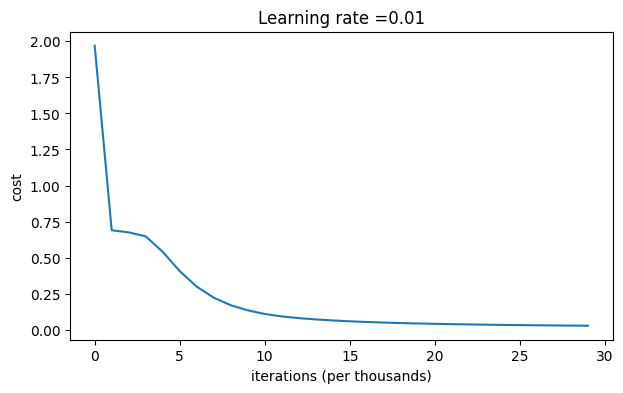

On the train set:
Accuracy: 0.9966666666666667
On the test set:
Accuracy: 0.94


In [30]:
### Run the following code to train your model on 15,000 iterations using random initialization
parameters = model(train_X, train_Y, num_iterations=30000, initialization = "random")
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)


if you see "inf" as the cost after the iteration 0, this is beacause of numerical roundoff. A more numerically sophisticated implementation would fix this, but for the purpose of this notebook, it isn't worth worring about. 

In any case, you've now broken the symmetry, and this gives noticealy better accuracy than before. The model is no longer outputing all 0s. 
Progress!

In [31]:
print(predictions_train)
print(predictions_test)

[[1 0 1 1 0 0 1 0 1 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 1 1 0 1 1 0 0 0
  0 1 0 1 1 1 1 0 0 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 0 1 0 1 0 1 0 1 1 0
  0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 1 0 1 0 0 1 0 1 1 0
  0 0 1 1 0 0 1 0 0 1 1 0 1 1 1 0 0 0 0 1 0 1 1 0 1 1 1 1 0 1 1 0 0 0 0 0
  0 0 1 0 1 0 1 0 1 1 1 0 0 1 1 0 1 0 1 1 0 1 0 1 1 0 1 0 1 1 0 1 0 0 1 0
  1 0 0 0 1 0 1 1 1 0 0 1 1 0 0 1 0 1 0 0 1 0 1 1 0 1 1 1 1 0 1 0 1 0 0 1
  0 1 0 0 0 1 1 1 1 0 1 0 0 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 1 1 0 1 0
  1 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 1 1 0 0 1 1 1 1
  1 1 1 0 0 0 0 1 1 0 1 0]]
[[1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 1 1 1 0 1 0 0 1
  0 1 1 0 0 1 1 1 1 1 0 0 1 1 0 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0
  1 1 1 1 0 1 1 1 0 1 0 0 0 0 1 0 1 1 0 0 0 1 1 0 0 0 0 0]]


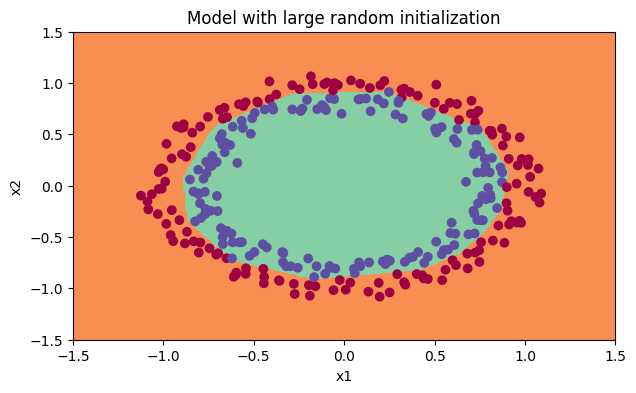

In [32]:
plt.title("Model with large random initialization")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

**Observations**

- The cost starts very high. This is because with large random-valued weights, the last activation (sigmoid) outputs results that aer very close to 0 or 1 for some examples, and when it gets that example wrong it incurs a very high loss for that example. indeed, when log(a3) = log(0), the loss goes to infinity.
- Poor initialization can lead to vanishing/exploding gradients, which also slows down the optimization algorithm. 
- If you train this network longer you will see better results, but initializing with overly large random numbers slows down the optimization. 


<font color='blue'>
    
**In summary**:
- Initializing weights to very large random values doesn't work well. 
- Initializing with small random values should do better. The important question is, how small should be these random values be? Let's find out up next!

<font color='black'>

**Optional Read:**


The main difference between Gaussian variable (`numpy.random.randn()`) and uniform random variable is the distribution of the generated random numbers:
*在统计学和概率论中，高斯变量指的是其概率分布遵循正态分布（也称为高斯分布）的随机变量。*
*在概率论和统计学中，均匀随机变量指的是在其定义域内每个值出现的概率都相同的随机变量。这意味着如果有一个均匀随机变量，它落在任何与定义域内区间长度相等的子区间内的概率是相同的。*

- numpy.random.rand() produces numbers in a [uniform distribution](https://raw.githubusercontent.com/jahnog/deeplearning-notes/master/Course2/images/rand.jpg).
- and numpy.random.randn() produces numbers in a [normal distribution](https://raw.githubusercontent.com/jahnog/deeplearning-notes/master/Course2/images/randn.jpg).

When used for weight initialization, randn() helps most the weights to Avoid being close to the extremes, allocating most of them in the center of the range.

An intuitive way to see it is, for example, if you take the [sigmoid() activation function](https://raw.githubusercontent.com/jahnog/deeplearning-notes/master/Course2/images/sigmoid.jpg).

You’ll remember that the slope near 0 or near 1 is extremely small, so the weights near those extremes will converge much more slowly to the solution, and having most of them near the center will speed the convergence.

#### 6-He Initialization

Finally, try "He Initialization"; this is named for the first author of He et al., 2015. (If you have heard of "Xavier initialization", this is similar except Xavier initialization uses a scaling factor for the weights $W^{[l]}$ of `sqrt(1./layers_dims[l-1])` where He initialization would use `sqrt(2./layers_dims[l-1])`.)

### Exercise 3 - initialize_parameters_he

Implement the following function to initialize your parameters with He initialization. This function is similar to the previous `initialize_parameters_random(...)`. The only difference is that instead of multiplying `np.random.randn(..,..)` by 10, you will multiply it by $\sqrt{\frac{2}{\text{dimension of the previous layer}}}$, which is what He initialization recommends for layers with a ReLU activation. 

In [20]:
## GRADE FUNCTION: initialize_parameters_he
def initialize_parameters_he(layers_dims):
    """
    Argument:
    layer_dims -- python array (list) containing the size of each layer.  e.g. [2,4,5,1] means: 2-input layer, 4-neuron hidden layer, 5-neuron hidden layer, 1-output layer. index in this array will be used as the layer index in the parameters dictionary.
        
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    Wl -- weight matrix of shape (layer_dims[l], layer_dims[l-1])
                    bl -- bias vector of shape (layer_dims[l], 1)
    """
    
    np.random.seed(3)               # This seed makes sure your "random" numbers will be the same as ours
    parameters = {}
    L = len(layers_dims)   # number of layers in the network
    
    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layers_dims[l], layers_dims[l-1]) * np.sqrt(2. / layers_dims[l-1])
        parameters['b' + str(l)] = np.zeros((layers_dims[l], 1))
        
        # Ensure that your dimensions are correct
        assert(parameters['W' + str(l)].shape == (layers_dims[l], layers_dims[l-1]))
        assert(parameters['b' + str(l)].shape == (layers_dims[l], 1))

        
    return parameters


In [21]:
parameters = initialize_parameters_he([2,4,1])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))
initialize_parameters_he_test(initialize_parameters_he)

W1 = [[ 1.78862847  0.43650985]
 [ 0.09649747 -1.8634927 ]
 [-0.2773882  -0.35475898]
 [-0.08274148 -0.62700068]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.03098412 -0.33744411 -0.92904268  0.62552248]]
b2 = [[0.]]
 All tests passed.


Cost after iteration 0: 0.883054
Cost after iteration 1000: 0.687983
Cost after iteration 2000: 0.675129
Cost after iteration 3000: 0.652612
Cost after iteration 4000: 0.608296
Cost after iteration 5000: 0.530494
Cost after iteration 6000: 0.413865
Cost after iteration 7000: 0.311780
Cost after iteration 8000: 0.236962
Cost after iteration 9000: 0.185973
Cost after iteration 10000: 0.150156
Cost after iteration 11000: 0.123251
Cost after iteration 12000: 0.099177
Cost after iteration 13000: 0.084571
Cost after iteration 14000: 0.073579


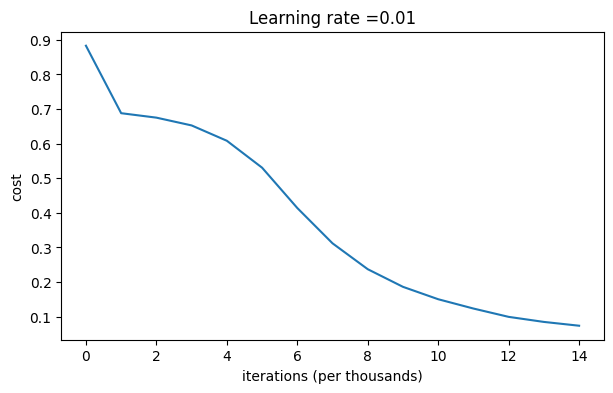

On the train set:
Accuracy: 0.9933333333333333
On the test set:
Accuracy: 0.96


In [22]:
parameters = model(train_X, train_Y, initialization = "he")
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)


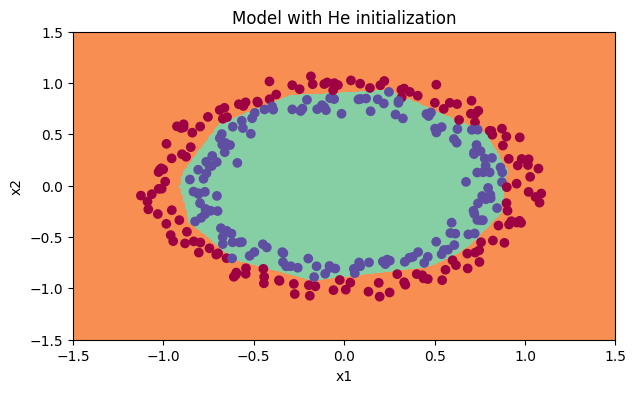

In [23]:
plt.title("Model with He initialization")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

**Observations**

-  the model with He initialization seperates the blue and the red dots very well in a small number of iterations. 



## 7 - Conclusions

You've tried three different types of initializations. For the same number of iterations and same hyperparameters, the comparison is:

<table> 
    <tr>
        <td>
            <b>Model</b>
        </td>
        <td>
            <b>Train accuracy</b>
        </td>
        <td>
            <b>Problem/Comment</b>
        </td>
    </tr>
        <td>
        3-layer NN with zeros initialization
        </td>
        <td>
        50%
        </td>
        <td>
        fails to break symmetry
        </td>
    <tr>
        <td>
        3-layer NN with large random initialization
        </td>
        <td>
        83%
        </td>
        <td>
        too large weights 
        </td>
    </tr>
    <tr>
        <td>
        3-layer NN with He initialization
        </td>
        <td>
        99%
        </td>
        <td>
        recommended method
        </td>
    </tr>
</table> 

**Congratulations**! You've completed this notebook on Initialization. 

Here's a quick recap of the main takeaways:

<font color='blue'>
    
- Different initializations lead to very different results
- Random initialization is used to break symmetry and make sure different hidden units can learn different things
- Resist initializing to values that are too large!
- He initialization works well for networks with ReLU activations


<font color='blue'>


**Observations**

- The cost starts very high. This is because with large random-valued weights, the last activation (sigmoid) outputs results that aer very close to 0 or 1 for some examples, and when it gets that example wrong it incurs a very high loss for that example. indeed, when log(a3) = log(0), the loss goes to infinity.
- Poor initialization can lead to vanishing/exploding gradients, which also slows down the optimization algorithm. 
- If you train this network longer you will see better results, but initializing with overly large random numbers slows down the optimization. 
